# Linear Regression
## Question 1
Make a class called LinearRegression which provides two functions : fit and predict. Try to implement it from scratch. If stuck, refer to the examples folder.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [2]:
class LinerRegression:
  def __init__(self,learning_rate,epochs):
    self.lr = learning_rate
    self.epoch=epochs
  def fit(self,X_train,y_train):
    n_samples,n_features=X_train.shape
    y_train=y_train.reshape(-1,1)
    self.weighs=np.zeros((n_features,1))
    self.bias=np.zeros((1,1))
    for i in range(self.epochs):
      delta= -(y_train-np.dot(X_train,self.weights)-self.bias)/n_samples
      dw= np.dot(X_train.T,delta)
      db= np.sum(delta).reshape(1,1)
      self.weights-= self.lr * dw
      self.bias-= self.lr* db
  def predict(self, X_test):
      y_predicted = np.dot(X_test,self.weights)+self.bias
      print(self.weights, self.bias)
      return y_predicted

## Question 2

Use the dataset https://www.kaggle.com/datasets/quantbruce/real-estate-price-prediction (*).
1. Read it using pandas.
2. Check for **null values**.
3. For each of the columns (except the first and last), plot the column values in the X-axis against the last column of prices in the Y-axis.
4. Remove the unwanted columns.
5. Split the dataset into train and test data. Test data size = 25% of total dataset.
6. **Normalize** the X_train and X_test using MinMaxScaler from sklearn.preprocessing.
7. Fit the training data into the model created in question 1 and predict the testing data.
8. Use **mean square error and R<sup>2</sup>** from sklearn.metrics as evaluation criterias.
9. Fit the training data into the models of the same name provided by sklearn.linear_model and evaluate the predictions using MSE and R<sup>2</sup>.
10. Tune the hyperparameters of your models (learning rate, epochs) to achieve losses close to that of the sklearn models.

Note : (*) To solve this question, you may proceed in any of the following ways :
1. Prepare the notebook in Kaggle, download it and submit it separately with the other questions.
2. Download the dataset from kaggle. Upload it to the session storage in Colab.
3. Use Colab data directly in Colab. [Refer here](https://www.kaggle.com/general/74235). For this, you need to create kaggle API token. Before submitting, hide or remove the API token.

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/ACM SIGCHI/Real estate.csv')

# Check for null values
print(df.isnull().sum())


No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64


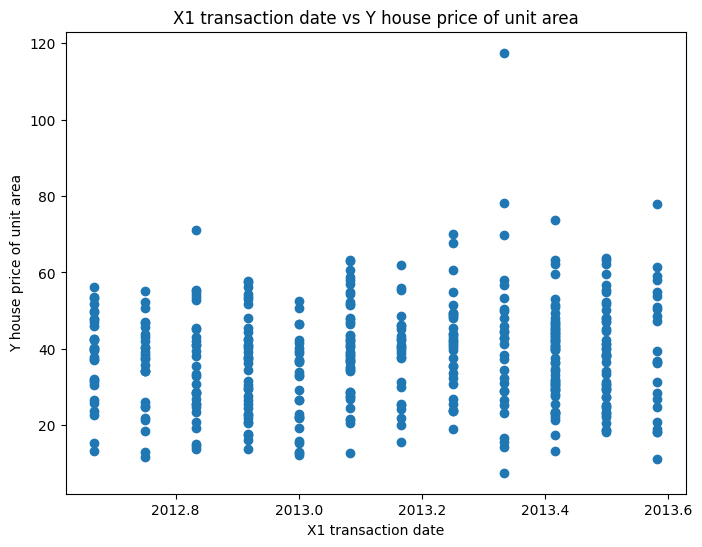

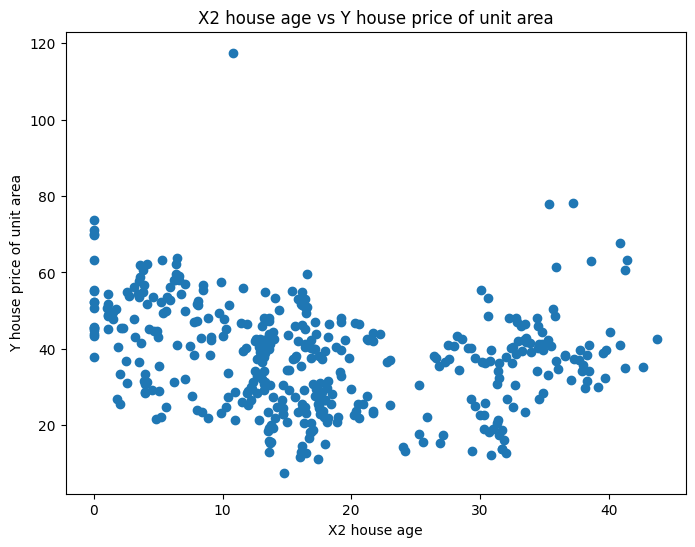

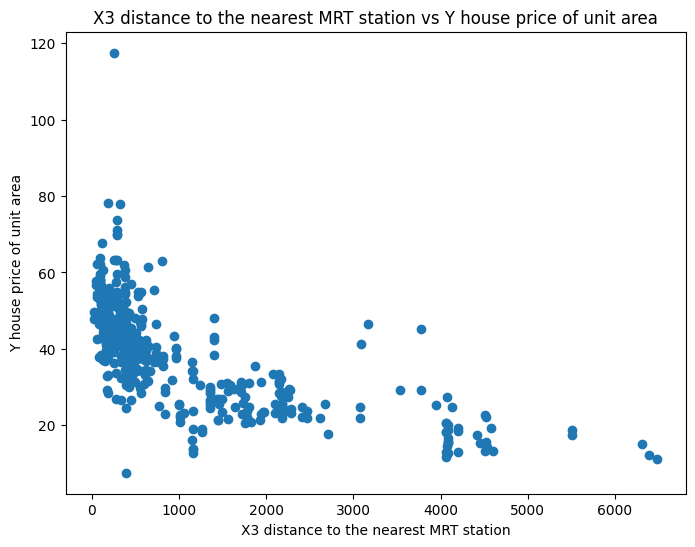

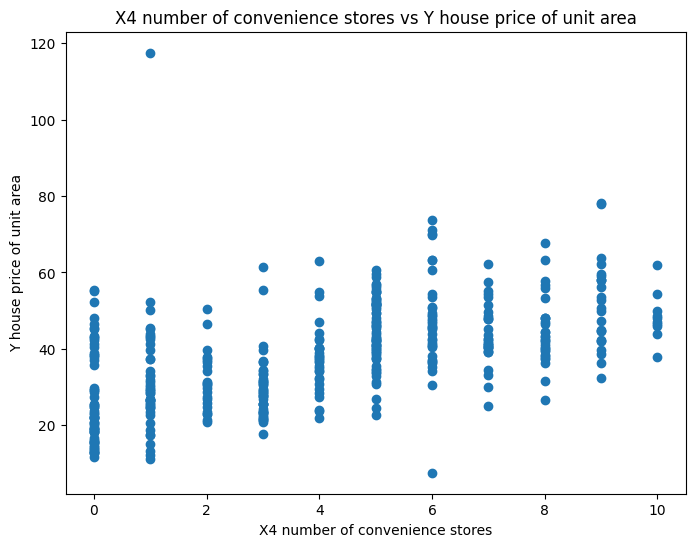

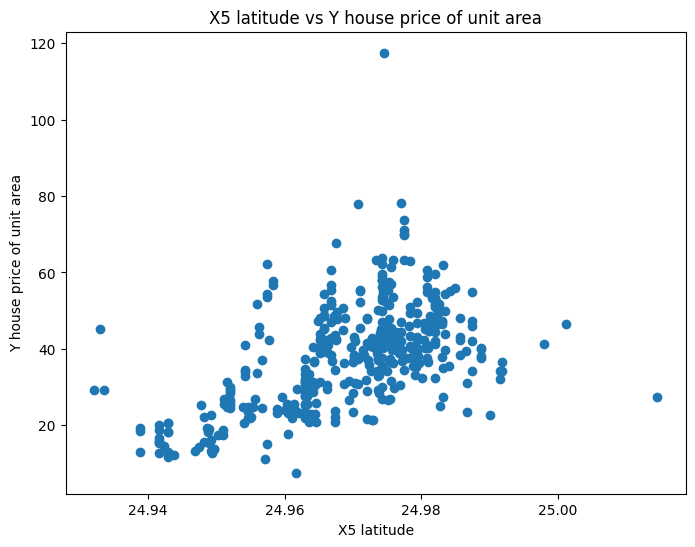

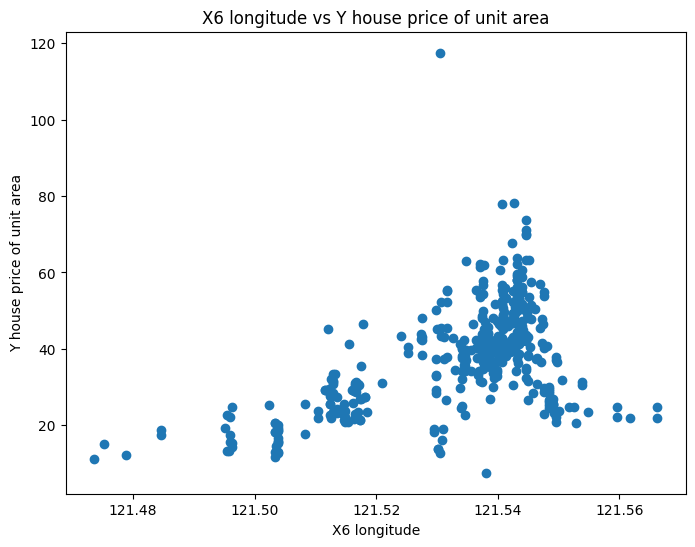

In [6]:
import matplotlib.pyplot as plt

# Extract the columns to plot
columns_to_plot = df.columns[1:-1]
price_column = df.columns[-1]

# Plot each column against the price
for column in columns_to_plot:
    plt.figure(figsize=(8, 6))
    plt.scatter(df[column], df[price_column])
    plt.xlabel(column)
    plt.ylabel(price_column)
    plt.title(f'{column} vs {price_column}')
    plt.show()


In [7]:
df = df.drop(columns=[df.columns[0]])


In [8]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=[price_column])
y = df[price_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [9]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [11]:
class LinearRegression:
    def __init__(self, learning_rate, epochs):
        self.lr = learning_rate
        self.epochs = epochs

    def fit(self, X_train, y_train):
        n_samples, n_features = X_train.shape
        y_train = y_train.values.reshape(-1, 1)
        self.weights = np.zeros((n_features, 1))
        self.bias = np.zeros((1, 1))

        for i in range(self.epochs):
            predictions = np.dot(X_train, self.weights) + self.bias
            errors = predictions - y_train
            dw = np.dot(X_train.T, errors) / n_samples
            db = np.sum(errors) / n_samples
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X_test):
        return np.dot(X_test, self.weights) + self.bias

# Instantiate and fit the custom model
custom_model = LinearRegression(learning_rate=0.01, epochs=1000)
custom_model.fit(X_train_scaled, y_train)
y_pred_custom = custom_model.predict(X_test_scaled)


In [12]:
# Evaluate custom model
from sklearn.metrics import mean_squared_error, r2_score
mse_custom = mean_squared_error(y_test, y_pred_custom)
r2_custom = r2_score(y_test, y_pred_custom)
print(f'Custom Model - MSE: {mse_custom}, R2: {r2_custom}')


Custom Model - MSE: 76.95903384218065, R2: 0.5148171195009081


In [13]:
from sklearn.linear_model import LinearRegression as SklearnLinearRegression
# Instantiate and fit the sklearn Linear Regression model
sklearn_model = SklearnLinearRegression()
sklearn_model.fit(X_train_scaled, y_train)
y_pred_sklearn = sklearn_model.predict(X_test_scaled)

# Evaluate sklearn model
mse_sklearn = mean_squared_error(y_test, y_pred_sklearn)
r2_sklearn = r2_score(y_test, y_pred_sklearn)
print(f'sklearn Linear Regression - MSE: {mse_sklearn}, R2: {r2_sklearn}')


sklearn Linear Regression - MSE: 66.6733627183596, R2: 0.579662418286177


In [14]:
# Example: Test different learning rates and epochs
learning_rates = [0.001, 0.01, 0.1]
epochs_list = [500, 1000, 1500]

for lr in learning_rates:
    for epochs in epochs_list:
        model = LinearRegression(learning_rate=lr, epochs=epochs)
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        print(f'Learning Rate: {lr}, Epochs: {epochs} - MSE: {mse}, R2: {r2}')


Learning Rate: 0.001, Epochs: 500 - MSE: 212.80601011622352, R2: -0.3416207015727606
Learning Rate: 0.001, Epochs: 1000 - MSE: 113.93312734929042, R2: 0.2817165165436246
Learning Rate: 0.001, Epochs: 1500 - MSE: 108.3583113180116, R2: 0.3168625567843987
Learning Rate: 0.01, Epochs: 500 - MSE: 90.58514408903062, R2: 0.42891225441226477
Learning Rate: 0.01, Epochs: 1000 - MSE: 76.95903384218065, R2: 0.5148171195009081
Learning Rate: 0.01, Epochs: 1500 - MSE: 71.50612814886024, R2: 0.5491945844883261
Learning Rate: 0.1, Epochs: 500 - MSE: 65.78157082629502, R2: 0.5852846582935676
Learning Rate: 0.1, Epochs: 1000 - MSE: 65.10578372955592, R2: 0.5895451110803369
Learning Rate: 0.1, Epochs: 1500 - MSE: 65.0695391157564, R2: 0.5897736127291737


# Logistic Regression
## Question 3

The breast cancer dataset is a binary classification dataset commonly used in machine learning tasks. It is available in scikit-learn (sklearn) as part of its datasets module.
Here is an explanation of the breast cancer dataset's components:

* Features (X):

 * The breast cancer dataset consists of 30 numeric features representing different characteristics of the FNA images. These features include mean, standard error, and worst (largest) values of various attributes such as radius, texture, smoothness, compactness, concavity, symmetry, fractal dimension, etc.

* Target (y):

 * The breast cancer dataset is a binary classification problem, and the target variable (y) represents the diagnosis of the breast mass. It contains two classes:
    * 0: Represents a malignant (cancerous) tumor.
    * 1: Represents a benign (non-cancerous) tumor.

Complete the code given below in place of the "..."

In [15]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


# Load and preprocess the dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Normalize the data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)


# Checking the shapes of the resulting splits
print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Testing labels shape: {y_test.shape}")



Training data shape: (426, 30)
Testing data shape: (143, 30)
Training labels shape: (426,)
Testing labels shape: (143,)


1. Load the dataset from sklearn.datasets
2. Separate out the X and Y columns.
3. Normalize the X data using MinMaxScaler or StandardScaler.
4. Create a train-test-split. Take any suitable test size.

5. Write code for the sigmoid function and Logistic regression.


In [16]:
import numpy as np

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(z):
    s = sigmoid(z)
    return s * (1 - s)


class LogisticRegression:
    def __init__(self, learning_rate, epochs):
        self.lr = learning_rate
        self.epochs = epochs

    def fit(self, X, y):
        n_samples, n_features = X.shape
        y = y.reshape(-1, 1)
        self.weights = np.zeros((n_features, 1))
        self.bias = 0


        for _ in range(self.epochs):
            z = np.dot(X, self.weights) + self.bias
            y_pred = sigmoid(z)
            dz = y_pred - y
            dw = np.dot(X.T, dz) / n_samples
            db = np.sum(dz) / n_samples
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        z = np.dot(X, self.weights) + self.bias
        y_pred = sigmoid(z)
        return np.round(y_pred)


6. Fit your model on the dataset and make predictions.
7. Compare your model with the Sklearn Logistic Regression model. Try out all the different penalties.
8. Print accuracy_score in each case using sklearn.metrics .

In [17]:
from sklearn.linear_model import LogisticRegression as SklearnLogisticRegression
from sklearn.metrics import accuracy_score

custom_model = LogisticRegression(learning_rate=0.01, epochs=1000)
custom_model.fit(X_train, y_train)
y_pred_custom = custom_model.predict(X_test)
accuracy_custom = accuracy_score(y_test, y_pred_custom)
print(f'Custom Logistic Regression Accuracy: {accuracy_custom}')


penalties = ['none', 'l2', 'l1', 'elasticnet']
for penalty in penalties:
    if penalty == 'l1' or penalty == 'elasticnet':
        model = SklearnLogisticRegression(penalty=penalty, solver='saga', max_iter=1000, l1_ratio=0.5 if penalty == 'elasticnet' else None)
    else:
        model = SklearnLogisticRegression(penalty=penalty, max_iter=1000)

    model.fit(X_train, y_train)
    y_pred_sklearn = model.predict(X_test)
    accuracy_sklearn = accuracy_score(y_test, y_pred_sklearn)
    print(f'Sklearn Logistic Regression Accuracy with penalty={penalty}: {accuracy_sklearn}')


Custom Logistic Regression Accuracy: 0.9300699300699301
Sklearn Logistic Regression Accuracy with penalty=none: 0.9300699300699301
Sklearn Logistic Regression Accuracy with penalty=l2: 0.986013986013986


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


Sklearn Logistic Regression Accuracy with penalty=l1: 0.965034965034965
Sklearn Logistic Regression Accuracy with penalty=elasticnet: 0.986013986013986


9. For the best model in each case (yours and scikit-learn), print the classification_report using sklearn.metrics .
10. For the best model in each case (yours and scikit-learn), print the confusion_matrix using sklearn.metrics .

In [18]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Custom Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_custom))
print("Custom Logistic Regression Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_custom))


best_penalty = 'l2'
model = SklearnLogisticRegression(penalty=best_penalty, max_iter=1000)
model.fit(X_train, y_train)
y_pred_sklearn = model.predict(X_test)


print(f"Scikit-Learn Logistic Regression Classification Report (penalty={best_penalty}):")
print(classification_report(y_test, y_pred_sklearn))
print(f"Scikit-Learn Logistic Regression Confusion Matrix (penalty={best_penalty}):")
print(confusion_matrix(y_test, y_pred_sklearn))

Custom Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.81      0.90        54
           1       0.90      1.00      0.95        89

    accuracy                           0.93       143
   macro avg       0.95      0.91      0.92       143
weighted avg       0.94      0.93      0.93       143

Custom Logistic Regression Confusion Matrix:
[[44 10]
 [ 0 89]]
Scikit-Learn Logistic Regression Classification Report (penalty=l2):
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        54
           1       0.98      1.00      0.99        89

    accuracy                           0.99       143
   macro avg       0.99      0.98      0.99       143
weighted avg       0.99      0.99      0.99       143

Scikit-Learn Logistic Regression Confusion Matrix (penalty=l2):
[[52  2]
 [ 0 89]]


# KNN
## Question 4

How accurately can a K-Nearest Neighbors (KNN) model classify different types of glass based on a glass classification dataset consisting of 214 samples and 7 classes? Use the kaggle dataset "https://www.kaggle.com/datasets/uciml/glass".

Context: This is a Glass Identification Data Set from UCI. It contains 10 attributes including id. The response is glass type(discrete 7 values)

1. Load the data as you did in the 2nd question.
2. Extract the X and Y columns.
3. Split it into training and testing datasets.

In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

# Load the dataset

data = pd.read_csv('/content/drive/MyDrive/ACM SIGCHI/glass.csv')

# Drop the 'id' column and extract features and target

X = data.drop(columns=['Type']).values  # Convert to numpy array
y = data['Type'].values  # Convert to numpy array

# Split the dataset into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



4. Define Euclidean distance.
5. Build the KNN model.
6. Fit the model on the training data. (Note : you may require to change the type of the data from pandas dataframe to numpy arrays. To do that, just do this X=np.array(X) and so on...)

In [22]:
# Define Euclidean distance function
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

# Build the custom KNN model
class KNN:
    def __init__(self, k=5):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        # Compute distances between x and all examples in the training set
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        # Sort by distance and return indices of the first k neighbors
        k_indices = np.argsort(distances)[:self.k]
        # Extract the labels of the k nearest neighbor training samples
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        # Return the most common class label among the k neighbors
        most_common = np.bincount(k_nearest_labels).argmax()
        return most_common



7. Make predictions. Find their accuracy using accuracy_score. Try different k values. k=3 worked well in our case.
8. Compare with the sklearn model (from sklearn.neighbors import KNeighborsClassifier)

In [23]:
# Evaluate custom KNN for different k values
def evaluate_knn(X_train, X_test, y_train, y_test, k_values):
    for k in k_values:
        # Initialize and train the KNN model
        knn = KNN(k=k)
        knn.fit(X_train, y_train)

        # Make predictions
        y_pred = knn.predict(X_test)

        # Evaluate the model
        accuracy = accuracy_score(y_test, y_pred)
        print(f"Custom KNN with K={k}: Accuracy = {accuracy}")

# Test different k values
k_values = [1, 3, 5, 7, 10]  # Example values, you can try more if needed
evaluate_knn(X_train_scaled, X_test_scaled, y_train, y_test, k_values)



Custom KNN with K=1: Accuracy = 0.7592592592592593
Custom KNN with K=3: Accuracy = 0.7222222222222222
Custom KNN with K=5: Accuracy = 0.6296296296296297
Custom KNN with K=7: Accuracy = 0.6851851851851852
Custom KNN with K=10: Accuracy = 0.6481481481481481


In [24]:
# Compare with scikit-learn KNN model
def evaluate_sklearn_knn(X_train, X_test, y_train, y_test, k_values):
    for k in k_values:
        # Initialize and train the scikit-learn KNN model
        model = KNeighborsClassifier(n_neighbors=k)
        model.fit(X_train, y_train)

        # Make predictions
        y_pred = model.predict(X_test)

        # Evaluate the model
        accuracy = accuracy_score(y_test, y_pred)
        print(f"Sklearn KNN with K={k}: Accuracy = {accuracy}")

# Test different k values with scikit-learn KNN
evaluate_sklearn_knn(X_train_scaled, X_test_scaled, y_train, y_test, k_values)


Sklearn KNN with K=1: Accuracy = 0.7592592592592593
Sklearn KNN with K=3: Accuracy = 0.7222222222222222
Sklearn KNN with K=5: Accuracy = 0.6296296296296297
Sklearn KNN with K=7: Accuracy = 0.6851851851851852
Sklearn KNN with K=10: Accuracy = 0.6481481481481481
